# Regresion Lineal con Variables Categoricas
+ Un modelo lineal solo acepta variables numericas
+ En caso de tener una categoria es posible separar esta en una columna dummie donde el valor es 1 en caso de estar presente o pertenecer a esta y 0 en caso contrario.
+ Para mas categorias se agregan columnas dummies hasta n-1 categorias ya que la no pertenencia a ninguna implica pertenencia a/de la ultima

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [108]:
df = pd.read_csv("../resources/python-ml-course/datasets/ecom-expense/Ecom Expense.csv")
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [109]:
dummy_gender = pd.get_dummies(df["Gender"], prefix="Gender")
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix= "City")

In [110]:
column_names = df.columns.values.tolist()
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [111]:
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,True,False
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,True,False
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,False,True
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,True,False
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,True,False


In [112]:
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,True,False,True,False,False
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,True,False,False,True,False
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,False,True,False,True,False
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,True,False,True,False,False
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,True,False,False,True,False


In [113]:
numeric_features = ["Total Spend","Monthly Income","Transaction Time",
                    "Gender_Female","Gender_Male",
                    "City_Tier 1","City_Tier 2","City_Tier 3",
                    "Record","Age "," Items "]
df_numeric = df_new[numeric_features]
df_numeric.corr()

,Total Spend,Monthly Income,Transaction Time,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,Record,Age,Items
Total Spend,1.000000,0.438623,-0.005610,-0.036481,0.036481,0.023415,-0.006640,-0.017109,0.857675,0.033610,0.067042
Monthly Income,0.438623,1.000000,-0.044855,-0.005637,0.005637,-0.015803,-0.004128,0.020205,0.018491,0.010164,-0.013364
Transaction Time,-0.005610,-0.044855,1.000000,-0.038704,0.038704,0.006533,-0.005512,-0.001094,-0.005044,-0.007045,-0.020551
Gender_Female,-0.036481,-0.005637,-0.038704,1.000000,-1.000000,0.003662,-0.001277,-0.002436,0.015554,0.026996,-0.006959
Gender_Male,0.036481,0.005637,0.038704,-1.000000,1.000000,-0.003662,0.001277,0.002436,-0.015554,-0.026996,0.006959
City_Tier 1,0.023415,-0.015803,0.006533,0.003662,-0.003662,1.000000,-0.510633,-0.502356,0.012696,-0.015177,0.035742
City_Tier 2,-0.006640,-0.004128,-0.005512,-0.001277,0.001277,-0.510633,1.000000,-0.486915,-0.021404,0.028467,0.006314
City_Tier 3,-0.017109,0.020205,-0.001094,-0.002436,0.002436,-0.502356,-0.486915,1.000000,0.008628,-0.013209,-0.042659
Record,0.857675,0.018491,-0.005044,0.015554,-0.015554,0.012696,-0.021404,0.008628,1.000000,0.003397,0.012683
Age,0.033610,0.010164,-0.007045,0.026996,-0.026996,-0.015177,0.028467,-0.013209,0.003397,1.000000,0.016626


In [114]:
feature_cols = ["Monthly Income","Transaction Time",
                "Gender_Female","Gender_Male",
                "City_Tier 1","City_Tier 2","City_Tier 3",
                "Record"]

In [115]:
X = df_new[feature_cols]
y = df_new["Total Spend"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [116]:
lm = LinearRegression()
lm.fit(X_train,y_train)
lm.score(X_test,y_test)

0.9157300327649733

In [117]:
pred = lm.predict(X_test)

SSD = np.sum((pred - y_test.tolist())**2)
RSE = np.sqrt(SSD/(len(y_test)-len(feature_cols)-1))
sales_mean = np.mean(y_test)
RSE_perc = RSE/sales_mean
print(f"SSD: {SSD}, RSE: {RSE}, error%: {RSE_perc*100}")

SSD: 326753078.26782155, RSE: 839.1717466673838, error%: 13.122863899558956


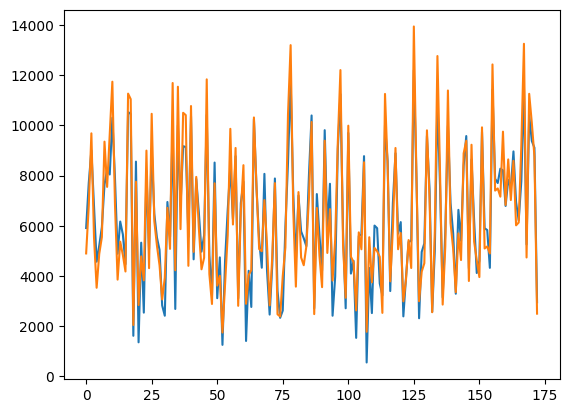

In [118]:
%matplotlib inline
plt.plot(pred[300:])
plt.plot(y_test.tolist()[300:])

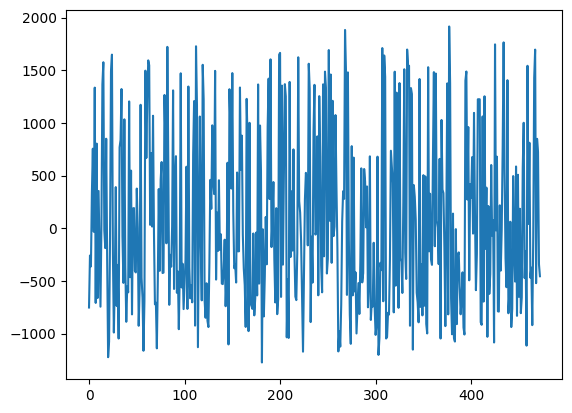

In [119]:
plt.plot(y_test.tolist()-pred)

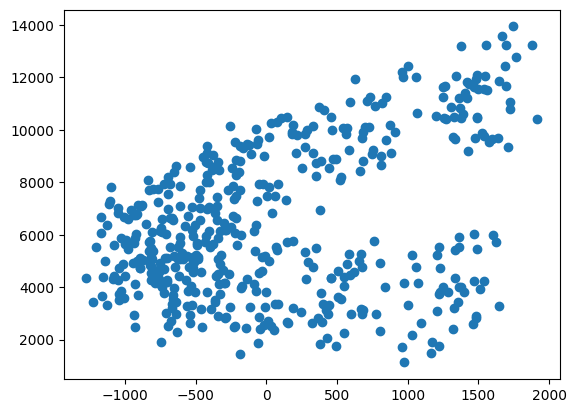

In [120]:
plt.scatter(y_test.tolist()-pred, y_test.tolist())

### Seleccion de features

In [121]:
from sklearn.feature_selection import RFE

estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=6)
selector = selector.fit(X_train, y_train)

In [122]:
selector.support_

array([False, False,  True,  True,  True,  True,  True,  True])

In [123]:
selector.ranking_

array([3, 2, 1, 1, 1, 1, 1, 1])

In [124]:
list(zip(feature_cols, selector.support_, selector.ranking_))

[('Monthly Income', False, 3),
 ('Transaction Time', False, 2),
 ('Gender_Female', True, 1),
 ('Gender_Male', True, 1),
 ('City_Tier 1', True, 1),
 ('City_Tier 2', True, 1),
 ('City_Tier 3', True, 1),
 ('Record', True, 1)]

### Transformacion de variables para conseguir una relacion no lineal

* Primero se evalua la linealidad

In [125]:
df2 = pd.read_csv("../resources/python-ml-course/datasets/auto/auto-mpg.csv")
df2.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [126]:
df2.shape

(406, 9)

* Limpieza de datos

In [127]:
df2["mpg"] = df2["mpg"].dropna()
df2["horsepower"] = df2["horsepower"].dropna()

Text(0, 0.5, 'MPG')

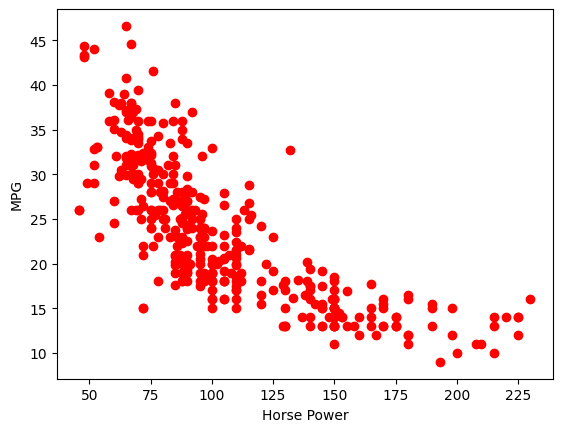

In [128]:
%matplotlib inline
plt.plot(df2["horsepower"], df2["mpg"], "ro")
plt.xlabel("Horse Power")
plt.ylabel("MPG")

In [129]:
X = df2["horsepower"].fillna(df2["horsepower"].mean())
y = df2["mpg"].fillna(df2["mpg"].mean())

X_train, X_test, y_train, y_test = train_test_split(X,y,shuffle=True,test_size=0.2)

In [130]:
lm2 = LinearRegression()
lm2.fit(X_train.to_numpy().reshape(-1, 1), y_train)
lm2.score(X_test.to_numpy().reshape(-1, 1), y_test)

0.5755002430009747

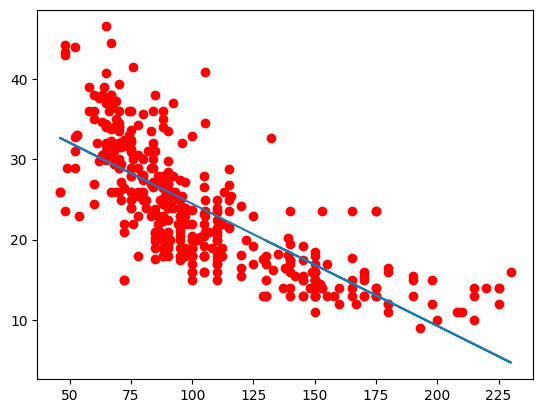

In [131]:
%matplotlib inline
plt.plot(X,y,"ro")
plt.plot(X,lm2.predict(X.to_numpy().reshape(-1, 1)))

A pesar de ser aceptable el resultado este se puede mejorar considerando la no linealidad

#### Modelo de regresion cuadratico

In [132]:
X_train = X_train.to_numpy().reshape(-1, 1)
X_test = X_test.to_numpy().reshape(-1, 1)

In [133]:
X_train2 = X_train**2
X_test2 = X_test**2

In [134]:
lm3 = LinearRegression()
lm3.fit(X_train2, y_train)
lm3.score(X_test2, y_test)

0.4914680369910106

El resultado no mejoro considerando la entrada al modelo lineal el cuadrado de las caracteristicas

#### Modelo de regresion polinomial

In [135]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [136]:
poly = PolynomialFeatures(degree=2)

In [137]:
X_train3 = poly.fit_transform(X_train)
X_test3 = poly.fit_transform(X_test)

In [138]:
lm4 = linear_model.LinearRegression()
lm4.fit(X_train3, y_train)
lm4.score(X_test3, y_test)

0.6405577371607892

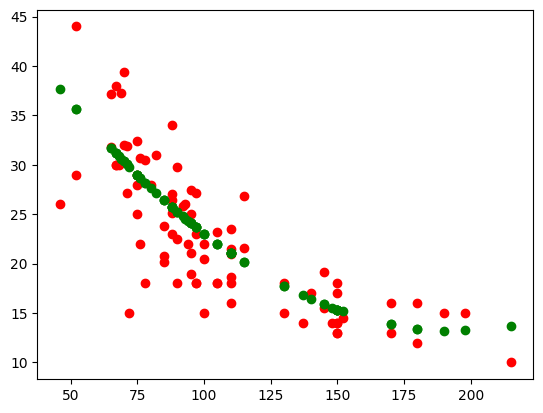

In [139]:
%matplotlib inline
plt.plot(X_test, y_test,"ro")
plt.plot(X_test, lm4.predict(X_test3), "go")

In [140]:
lm4.predict(X_test3)

array([15.35383022, 22.01980349, 29.78905886, 31.17887076, 23.67941513,
       35.68407278, 31.17887076, 25.71771904, 13.72763262, 30.89643149,
       28.98203302, 15.35383022, 24.11670246, 30.06254435, 21.05529558,
       23.04027245, 27.6817588 , 21.05529558, 13.42809539, 23.67941513,
       15.35383022, 25.24909352, 24.11670246, 24.78942177, 23.67941513,
       25.71771904, 24.11670246, 30.33826829, 35.68407278, 27.17731821,
       15.35383022, 17.75687448, 23.67941513, 28.98203302, 24.56294356,
       25.24909352, 30.06254435, 26.43744563, 31.75046461, 28.19515316,
       15.55384269, 24.33870379, 20.14674873, 17.75687448, 28.71750129,
       23.04027245, 37.62717544, 16.44343025, 28.98203302, 23.04027245,
       13.23387219, 31.75046461, 22.01980349, 24.11670246, 25.71771904,
       15.16277152, 16.81395988, 25.71771904, 28.71750129, 15.87064971,
       20.14674873, 13.42809539, 25.71771904, 21.05529558, 13.84616279,
       26.43744563, 26.43744563, 15.87064971, 28.19515316, 30.33